# Lab 5 - Classification : Naive Bayes and Logistic Regression

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Classification through Hypothesis Testing (Known Distribution)

**Here, the distribution of the data is already known.**

**Consider 2 one-dimensional Gaussian distributions : (1) mean -1 and variance 1 (2) mean 1 and variance 1.** <br> **a)Plot the 2 distributions on the same graph(100 data points each)** <br> **b)plot the likelihood function and the ratio of the likelihood function (a normalized function)**<br>**c) For the points x= -1.5, -0.5, 0, 0.5, 1.5, hypothesize what class they belong to.** <br> **d) Plot rough decision regions for this task. **<br>**e)For a Bayesian setup with equal probability of the hypothesis, compute the error in the estimate (as a function of x).**


**(5 points)**

**Estimated Time: 20 mins**

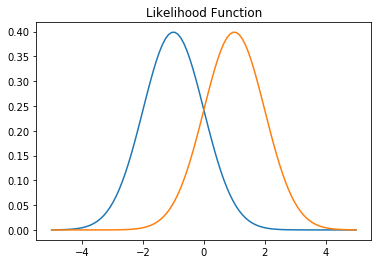

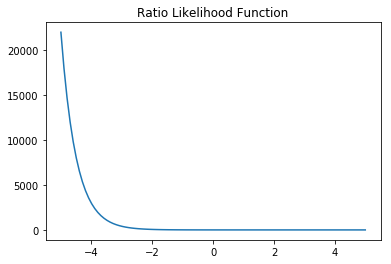

The point x = -1.5 belongs to Distribution 1 with probability 0.9525741268224333
The point x = -0.5 belongs to Distribution 1 with probability 0.7310585786300048
The point x = 0 belongs to Distribution 1 with probability 0.5
The point x = 0.5 belongs to Distribution 2 with probability 0.7310585786300049
The point x = 1.5 belongs to Distribution 2 with probability 0.9525741268224333


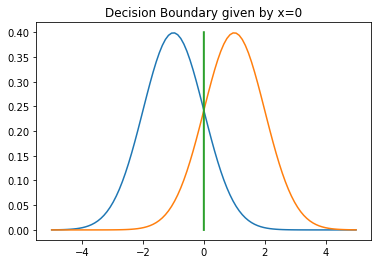

In [3]:
mu1 = -1
mu2 = 1
variance1 = 1
variance2 = 1
sigma1 = math.sqrt(variance1)
sigma2 = math.sqrt(variance2)
x = np.linspace(-5, 5, 100)
plt.plot(x, stats.norm.pdf(x, mu1, sigma1))
plt.plot(x, stats.norm.pdf(x, mu2, sigma2))
plt.title("Likelihood Function")
plt.show()

#----------- part b ---------------

ratio_array = np.zeros(len(x));

for i in range(len(x)):
    ratio_array[i] = stats.norm.pdf(x[i], mu1, sigma1)/stats.norm.pdf(x[i], mu2, sigma2)

# print(stats.norm.pdf(x[i], mu1, sigma1))
# print(ratio_array)
    
plt.plot(x, ratio_array)
plt.title("Ratio Likelihood Function")
plt.show()

x = [-1.5, -0.5, 0, 0.5, 1.5]

for point in x:
    pdf1 = stats.norm.pdf(point, mu1, sigma1)
    pdf2 = stats.norm.pdf(point, mu2, sigma2)
    probab_belong_1 = pdf1/(pdf1 + pdf2)
    if(probab_belong_1 >= 0.5):
        print("The point x = " + str(point) + " belongs to Distribution 1 with probability " + str(probab_belong_1))
    elif(probab_belong_1 < 0.5):
        print("The point x = " + str(point) + " belongs to Distribution 2 with probability " + str(1 - probab_belong_1))
        
# ----------- part d -----------

# We see that point x = 0 is the threshold as for x>0 probab_belong_1 < 0.5

mu1 = -1
mu2 = 1
variance1 = 1
variance2 = 1
sigma1 = math.sqrt(variance1)
sigma2 = math.sqrt(variance2)
x = np.linspace(-5, 5, 100)
plt.plot(x, stats.norm.pdf(x, mu1, sigma1))
plt.plot(x, stats.norm.pdf(x, mu2, sigma2))
plt.title("Decision Boundary given by x=0")

x = np.zeros(5000)
y = np.linspace(0, 0.4, 5000)

plt.plot(x, y, linewidth=2)
plt.show()


# Data Creation (5 points)

**(a) Load data 'Class0.txt' and 'Class1.txt' from the moodle page. Using the random seed to be 40, split it randomly into 75% train and 25% test datapoints.**

**Estimated time : 10 mins**

In [4]:
class0 = np.loadtxt('Class0.txt')
class1 = np.loadtxt('Class1.txt')

np.random.seed(40)

np.random.shuffle(class0)
np.random.shuffle(class1)

split_point = int(0.75*len(class0) - 1)

train_class0 = class0[:split_point]
train_class1 = class1[:split_point]
test_class0 = class0[split_point:]
test_class1 = class1[split_point:]

# Classification using Nearest Neighbours (10 points)

**Here, the class to which the new data point belongs to is found using the spatially nearest data points.**

**Use the above train data to create a new train data that has the first 500 points from class 0 and first 600 points from class 1. This will provide the data imbalance required for a thorough understanding of this concept. Use below given test points for this exercise.**  

**a)Take the number of nearest neighbours to be 10,100 and 1000. Find the class to which the given test points belong to. Code using numpy only. <br> b)Visualize the test points with respect to the train set data points. Use matplotlib.<br> c) Plot the decision boundary using scikit learn's inbuilt nearest neighbour classifier function.**

**Test Points: -0.999, 0.898, 0.8, 0.85, 0.115, 0.104, -0.112**

**Estimated Time: 20 mins**


Class Prediction for K = 10
[0, 1, 1, 1, 1, 1, 0]
Class Prediction for K = 100
[0, 1, 1, 1, 1, 1, 1]
Class Prediction for K = 1000
[1, 1, 1, 1, 1, 1, 1]


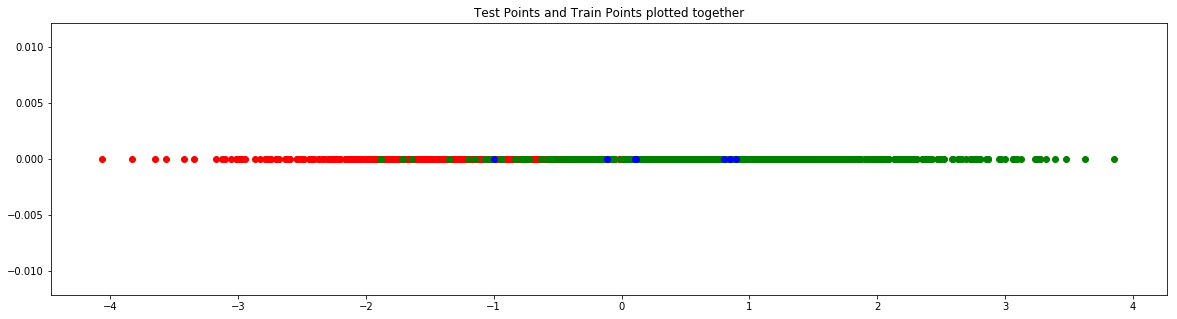

In [5]:
train_data = list(train_class0[:500]) + list(train_class1[:600])

neighbours = [10, 100, 1000]

for neighbour in neighbours:
    test_points = [-0.999, 0.898, 0.8, 0.85, 0.115, 0.104, -0.112]
    test_points_class = []

    for point in test_points:
        dict_array = [];
        for i in range(len(train_data)):
            if i < 500:
                dict_array.append({
                    'dist': abs(train_data[i] - point),
                    'class': -1
                })
            else:
                dict_array.append({
                    'dist': abs(train_data[i] - point),
                    'class': 1
                })

        dict_array.sort(key= lambda x: x['dist'])
        class_predict = 0

        for i in range(neighbour):
            class_predict += dict_array[i]['class']

        if(class_predict >= 0):
            test_points_class.append(1)
        else:
            test_points_class.append(0)

    print("Class Prediction for K = " + str(neighbour))
    print(test_points_class)

plt.figure(figsize=(20,5))
plt.scatter(train_class0[:500], np.zeros(500), color='red')
plt.scatter(train_class1[:600], np.zeros(600), color='green')
test_points = [-0.999, 0.898, 0.8, 0.85, 0.115, 0.104, -0.112]
plt.scatter(test_points, np.zeros(len(test_points)), color='blue')
# plt.xlim(-0.2, -0.05)
plt.title("Test Points and Train Points plotted together")
plt.show()

### Decision Boundary
- We see that all points x > -0.25 belong to class 1
- We see that all points x < -2.5 belong to class 0
- Region between x --> [-2.5, -0.25] is ambigious

# Naive Bayes (Assumed Distribution) (20 points)

**Here, the distribution of the data is assumed using some prior information. Naive Bayes works on the principle of Bayes' theorem. It assumes a prior fit for the dataset and then classifies the data into two or more classes. The prior can take the form of a Gaussian prior or any other valid probability distribution like multinomial or bernoulli.**

**Use above given train and test data for this exercise.**

**a)Assume a Gaussian prior. Use Bayes rule and Naive Bayes algorithm to find a threshold which will serve as the decision boundary. Points on one side of the boundary belong to class 0 and points on the other side of the boundary belong to class 1. Report the estimated threshold.<br> b) Use the threshold to classify the test points into one of the two classes. Report the accuracy. <br> c) How is Naive Bayes different from Nearest Neighbours(based on training done and inference computation time)?<br> d) Plot the decision region using matplotlib.
Estimated Time: 40 mins**

In [15]:
mean_class0 = np.mean(train_class0)
var_class0 = np.var(train_class0)
mean_class1 = np.mean(train_class1)
var_class1 = np.var(train_class1)
a1 = len(train_class0)/(len(train_class0)+len(train_class1))
a2 = 1-a1
sigma0 = math.sqrt(var_class0)
sigma1 = math.sqrt(var_class1)

x = np.linspace(-4, 4, 10)
thresholds = []
for i in range(10):
    min_point = x[0]
    max_point = x[-1]
    threshold = 0.5*(min_point + max_point)
    for j in range(len(x)):
        pdf1 = stats.norm.pdf(x[j], mean_class0, sigma0)
        pdf2 = stats.norm.pdf(x[j], mean_class1, sigma1)
        probab_belong_1 = (a1*pdf1)/(a1*pdf1 + a2*pdf2) # a = 0.5
        if(probab_belong_1 == 0.5):
            threshold = x[j]
            break
        if(probab_belong_1 < 0.5):
            max_point = x[j]
            min_point = x[j-1]
            break;
    thresholds.append(threshold)
    x = np.linspace(min_point, max_point, 10)

best_threshold = thresholds[-1] 

print("Estimated Threshold by convergence: ", best_threshold)

error_point = 0;
for point in test_class0:
    if point > best_threshold:
        error_point += 1;
for point in test_class1:
    if point <= best_threshold:
        error_point += 1;

# print(thresholds)
print("Accuracy = ", 100 - 100*error_point/(len(test_class0) + len(test_class1)))
        
    


Estimated Threshold by convergence:  -0.015265232913378498
Accuracy =  83.26693227091633


### Observations:

- Naive Bayes has a very strong assumption that Features are independent given the class which it belongs to.
- Naives Bayes also has an prior assumption on the distribution of data.
- Computational time for Naive Bayes is significantly less as compared to K-Nearest-Neighbour.
- K-Nearest-Neighbour Solution is lot more Depictive and Understandable.

##### Decision Boundary for this is just a line parallel to Y-axis showing everything to the left of threshold is class 0 and everything on the right is class 1

# Logistic Regression (No assumption) (30 points)

**Here, no previous assumption is made about the data's distribution.**

**Estimated Time: 1 hr**

**Use the above given train and test data for this exercise. The y value to which class 0 belongs to can be taken as 0 and the y value to which class 1 belongs to can be taken as 1.**

**(a) Fit a linear regression model to the dataset using sklearn. Report the accuracy. Use the threshold as 0.5 to classify to class 0 or class 1. You will find that linear regression is not apt to solve the problem.**

In [26]:
X_train = np.array(list(train_class0) + list(train_class1));
Y_train = np.append(np.zeros(len(train_class0)), np.ones(len(train_class1)));

X_train = X_train.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X_train, Y_train)

error_point = 0;
best_threshold = 0.5;
for point in test_class0:
    if reg.predict(np.array(point).reshape(-1, 1)) > best_threshold:
        error_point += 1;
for point in test_class1:
    if reg.predict(np.array(point).reshape(-1, 1)) <= best_threshold:
        error_point += 1;

print("Accuracy = ", 100 - 100*error_point/(len(test_class0) + len(test_class1)))

Accuracy =  83.26693227091633


**(b) Logistic Regression uses the sigmoid function for binary classification. Plot the sigmoid function for the range x : [-100,100]. This exercise will help you understand the shape of the sigmoid function and show its suitability in binary classification problems.**



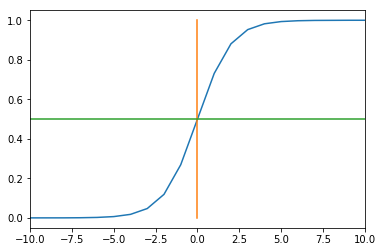

In [37]:
def sigmoid(x):
    sigma = 1/(1+np.exp(-x))
    return sigma

values = []
for i in np.arange(-500, 500):
    values +=[sigmoid(i)]
    
plt.xlim(-10, 10)
plt.plot(np.arange(-500, 500), values)
plt.plot([0]*1000,np.linspace(-0, 1, 1000))
plt.plot(np.linspace(-10, 10, 1000), [0.5]*1000)
plt.show()

**(c) Comment on the nature of the graph (specifically : domain,range,behaviour in extreme inputs). This task will give you further insight on the sigmoid function, which will help you while implementing logistic regression.**

### Observations:

- Sigmoid Function just squeezes the values to 0, 1.
- Value of sigma is converging to 1 as x tends to infinity, converging to 0 as x tends to -infinity
- At x = 0, sigma is 0.5(This the threshold)
- If we take 0.5 as our threshold, that means x>0 will give one class and x<0 will give another class
- As x tends to infinity, slope decreases 

**(d) Derive and plot the gradients of the sigmoid function for the same range. This is needed for gradient descent in logistic regression.**

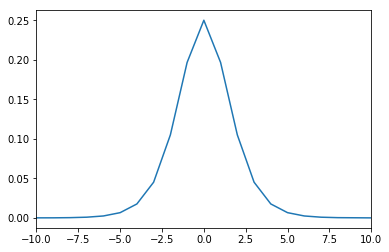

In [39]:
def sigmoid_gradient(x):
    gradient = sigmoid(x)*(1-sigmoid(x))
    return gradient

gradients = []
for i in np.arange(-500, 500):
    gradients +=[sigmoid_gradient(i)]
    
plt.xlim(-10,10)
plt.plot(np.arange(-500, 500), gradients)
plt.show()

**(e)Again, use the above created train and test set. Implement logistic regression (using only numpy) to predict whether the datapoints belongs to class 0 or 1. Gradient descent also has to be implemented using numpy. Tune the learning rate parameter between 0.001, 0.01, 0.1 and the number of iterations between 50, 100 and 1000 to arrive at a good solution. Use a random initialization of weight and bias.
<br>Estimated time: 1 hr**


In [0]:
# Insert code here

**(f) Plot the decision boundary.**

In [0]:
# Insert code here

**(f) What are the advantages of using a Negative Log Likelihood cost function here, as opposed to a least squares cost function in linear regression? (answer should be based on the difference in the tasks and the output functions, convexity of the function).**


### Advantages:

- Both Negative Log Likelihood cost function and least squares cost function are convex and hence, global minima can be obtained with Gradient Descent.

- Least square, panalizes large errors quadratically.

- Logistic loss function causes large errors to be penalized to an asymptotic constant.

- Logistic regression results are comparable to those of least square regression in many ways, but gives more accurate predictions of probabilities. Least square regression is accurate in predicting continuous values from dependent variables.

**a)Load LogReg_2d_data.txt and LogReg_2d_labels.txt from moodle. Perform random shuffle and train test split(75:25). Use sklearn to perform logistic regression on the dataset. <br>b)Report the accuracy and F1 score. <br>c)Visualize the decision boundary.**

Test accuracy:  96.0
Test f1score: 0.9655172413793104


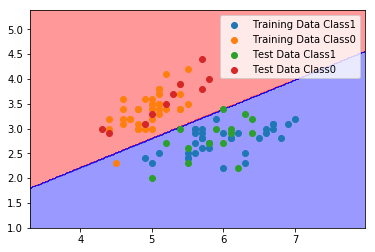

In [74]:
np.random.seed(8)

features = pd.read_csv('LogReg_2d_data.txt', sep = ' ', header = None)
target = pd.read_csv('LogReg_2d_labels.txt', header =None)
data_lg = pd.concat([features, target],axis=1).reset_index(drop=True)
data_lg.columns = ['x1', 'x2', 'Target']

shuffled_lg_data= data_lg.copy().values

np.random.shuffle(shuffled_lg_data)

shuffled_lg_dataframe = pd.DataFrame(shuffled_lg_data)

length = int(0.75*data_lg.shape[0])
train_data_lg = shuffled_lg_dataframe[:length]
test_data_lg = shuffled_lg_dataframe[length:]

train_data_lg.columns = ['x1', 'x2', 'Class']
test_data_lg.columns = ['x1', 'x2', 'Class']

X_train_lg = train_data_lg[['x1','x2']].values
y_train_lg = train_data_lg['Class'].values.reshape(-1,1)

X_test_lg = test_data_lg[['x1','x2']].values
y_test_lg = test_data_lg['Class'].values.reshape(-1,1)
log_reg = LogisticRegression()
log_reg.fit(X_train_lg,y_train_lg)

y_train_pred_lg = log_reg.predict(X_train_lg)
y_test_pred_lg = log_reg.predict(X_test_lg)
lg_train_error = accuracy_score(y_train_lg,y_train_pred_lg)*100
lg_test_error = accuracy_score(y_test_lg,y_test_pred_lg)*100

print("Test accuracy: ", lg_test_error)
print("Test f1score:", f1_score(y_test_pred_lg,y_test_lg))

def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
X_combined = np.vstack((X_train_lg, X_test_lg))
y_combined = train_data_lg['Class'].values.reshape(-1,1)

plot_decision_regions(X=X_combined,y=y_combined,classifier=log_reg)
plt.scatter(train_data_lg[train_data_lg['Class'] == 1]['x1'],train_data_lg[train_data_lg['Class'] == 1]['x2'],
            label = 'Training Data Class1')
plt.scatter(train_data_lg[train_data_lg['Class'] == 0]['x1'],train_data_lg[train_data_lg['Class'] == 0]['x2'],
            label = 'Training Data Class0')
plt.scatter(test_data_lg[test_data_lg['Class'] == 1]['x1'],test_data_lg[test_data_lg['Class'] == 1]['x2'],
            label = 'Test Data Class1')
plt.scatter(test_data_lg[test_data_lg['Class'] == 0]['x1'],test_data_lg[test_data_lg['Class'] == 0]['x2'],
            label = 'Test Data Class0')
plt.legend()
plt.show()

# The End